## **KELOMPOK CARINA**
### 1. Cindy Fara Nabila
### 2. Auranissa Efrida
### 3. Nurrocmi Andina

## **Analisis Korelasi dalam Menentukan Hubungan antara Jumlah Kasus Positif Harian COVID-19 dengan Beberapa Jenis Tingkat Mobilitas Masyarakat di Jakarta**



# **Problem statement**
1. Apakah ada pengaruh penerapan kebijakan PPKM terhadap jumlah kasus positif harian di Jakarta?
2. Bagaimana pengaruh varian delta dan omicron terhadap jumlah kasus positif harian di Jakarta?
3. Bagaimana korelasi antara jumlah kasus positif harian di Jakarta dengan tingkat mobilitas di Jakarta?


# **Data Cleaning and Preprocessing**

In [ ]:
#import module yang dibutuhkan
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

**Data Covid Jakarta**

In [ ]:
data_jakarta = pd.read_excel ("https://tiny.cc/Datacovidjakarta", sheet_name="Data Indonesia dan Jakarta")
data_jakarta.head()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-01-29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,2,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
3,2020-03-03,2,2,0,0,1,0,0,2,3,...,0,0,0,0,1,0,0,2,3,2
4,2020-03-04,2,2,0,0,1,0,0,2,3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_jakarta.drop(data_jakarta.columns[[1,2,3,4,11,12,13,14]], axis = 1, inplace = True) #drop kolom data covid Indonesia karena hanya ingin digunakan data covid Jakarta
data_jakarta.drop(data_jakarta.tail(1).index,inplace=True) #karena data terupdate harian maka kami menghapus baris kosong
data_jakarta = data_jakarta[0:850]
data_jakarta.tail()

,Tanggal,Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
845,2022-06-23,15311,1239359,6714,514,1261898,7228,0,605,438,11,1054,449
846,2022-06-24,15313,1240028,7301,522,1263164,7823,2,669,587,8,1266,595
847,2022-06-25,15313,1240738,7596,562,1264209,8158,0,710,295,40,1045,335
848,2022-06-26,15313,1241429,7931,591,1265264,8522,0,691,335,29,1055,364
849,2022-06-27,15313,1242286,7901,602,1266102,8503,0,857,-30,11,838,-19


In [ ]:
data_jakarta.isnull().all()
#untuk melihat apakah terdapat missing value

Tanggal                            False
Meninggal (Jakarta)                False
Sembuh (Jakarta)                   False
Self-Isolation (Jakarta)           False
Dirawat (Jakarta)                  False
Positif (Jakarta)                  False
Positif Aktif (Jakarta)            False
Meninggal Harian (Jakarta)         False
Sembuh Harian (Jakarta)            False
Self-Isolation Harian (Jakarta)    False
Dirawat Harian (Jakarta)           False
Positif Harian (Jakarta)           False
Positif Aktif Harian (Jakarta)     False
dtype: bool

Pada hasil diatas, terlihat tidak ada data covid Jakarta yang kosong.

**Data Mobilitas Jakarta 2021**

In [ ]:
mobilitas_jakarta21 = pd.read_csv ("/content/2021_ID_Region_Mobility_Report.csv")
mobilitas_jakarta21 = mobilitas_jakarta21.loc[mobilitas_jakarta21["sub_region_1"] == "Jakarta"]
mobilitas_jakarta21.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
4745,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2021-01-01,-46,-27,-51,-61.0,-73,22
4746,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2021-01-02,-39,-15,-50,-41.0,-33,11
4747,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2021-01-03,-40,-19,-58,-34.0,-15,9
4748,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2021-01-04,-29,-5,-50,-39.0,-32,13
4749,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2021-01-05,-32,-9,-53,-39.0,-33,14


In [ ]:
mobilitas_jakarta21.drop(mobilitas_jakarta21.columns[[3,4,6,7]], axis = 1, inplace = True) #menghapus kolom yang tidak diperlukan untuk analisis lebih lanjut
mobilitas_jakarta21.reset_index(drop=True, inplace=True) #mereset index agar indeks kembali mulai dari 0 (memudahkan mengetahui indeks data)
mobilitas_jakarta21.head()

,country_region_code,country_region,sub_region_1,iso_3166_2_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,ID,Indonesia,Jakarta,ID-JK,2021-01-01,-46,-27,-51,-61.0,-73,22
1,ID,Indonesia,Jakarta,ID-JK,2021-01-02,-39,-15,-50,-41.0,-33,11
2,ID,Indonesia,Jakarta,ID-JK,2021-01-03,-40,-19,-58,-34.0,-15,9
3,ID,Indonesia,Jakarta,ID-JK,2021-01-04,-29,-5,-50,-39.0,-32,13
4,ID,Indonesia,Jakarta,ID-JK,2021-01-05,-32,-9,-53,-39.0,-33,14


In [ ]:
mobilitas_jakarta21.isnull().all() #melihat apakah terdapat missing value pada data mobilitas jakarta 2021

country_region_code                                   False
country_region                                        False
sub_region_1                                          False
iso_3166_2_code                                       False
date                                                  False
retail_and_recreation_percent_change_from_baseline    False
grocery_and_pharmacy_percent_change_from_baseline     False
parks_percent_change_from_baseline                    False
transit_stations_percent_change_from_baseline         False
workplaces_percent_change_from_baseline               False
residential_percent_change_from_baseline              False
dtype: bool

Pada hasil diatas, terlihat tidak ada data mobilitas Jakarta 2021 yang kosong.

**Data Mobilitas Jakarta 2022**

In [ ]:
mobilitas_jakarta22 = pd.read_csv ("/content/2022_ID_Region_Mobility_Report.csv")
mobilitas_jakarta22 = mobilitas_jakarta22.loc[mobilitas_jakarta22["sub_region_1"] == "Jakarta"]
mobilitas_jakarta22.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2314,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2022-01-01,-18,1,-16,-29.0,-50,5
2315,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2022-01-02,-7,15,-23,-16.0,-9,2
2316,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2022-01-03,-7,18,-17,-23.0,-22,6
2317,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2022-01-04,-8,16,-17,-22.0,-20,6
2318,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2022-01-05,-9,11,-17,-21.0,-18,6


In [ ]:
mobilitas_jakarta22.drop(mobilitas_jakarta22.columns[[3,4,6,7]], axis = 1, inplace = True)
mobilitas_jakarta22.reset_index(drop=True, inplace=True)
mobilitas_jakarta22.head()

,country_region_code,country_region,sub_region_1,iso_3166_2_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,ID,Indonesia,Jakarta,ID-JK,2022-01-01,-18,1,-16,-29.0,-50,5
1,ID,Indonesia,Jakarta,ID-JK,2022-01-02,-7,15,-23,-16.0,-9,2
2,ID,Indonesia,Jakarta,ID-JK,2022-01-03,-7,18,-17,-23.0,-22,6
3,ID,Indonesia,Jakarta,ID-JK,2022-01-04,-8,16,-17,-22.0,-20,6
4,ID,Indonesia,Jakarta,ID-JK,2022-01-05,-9,11,-17,-21.0,-18,6


In [ ]:
mobilitas_jakarta22.isnull().all() #melihat apakah terdapat missing value pada data mobilitas jakarta 2021

country_region_code                                   False
country_region                                        False
sub_region_1                                          False
iso_3166_2_code                                       False
date                                                  False
retail_and_recreation_percent_change_from_baseline    False
grocery_and_pharmacy_percent_change_from_baseline     False
parks_percent_change_from_baseline                    False
transit_stations_percent_change_from_baseline         False
workplaces_percent_change_from_baseline               False
residential_percent_change_from_baseline              False
dtype: bool

Pada hasil diatas, terlihat tidak ada data mobilitas Jakarta 2022 yang kosong.

# **Exploratory Data Analysis**

### **Statistika Deskriptif**

In [ ]:
data_jakarta.describe()

,Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
count,850.000000,8.500000e+02,850.000000,850.000000,8.500000e+02,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,7583.942353,4.957319e+05,9076.005882,3435.641176,5.158275e+05,12511.647059,18.015294,1461.512941,9.295294,0.708235,1489.531765,10.003529
std,5772.194062,4.365092e+05,15150.325599,4758.956386,4.443218e+05,19502.586181,27.959773,2748.693443,1422.037414,628.909960,2526.921998,1720.114552
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-11310.000000,-11568.000000,0.000000,-12107.000000
25%,1707.500000,5.802200e+04,1314.750000,504.500000,7.246000e+04,2244.000000,2.000000,122.000000,-115.500000,-61.750000,131.000000,-141.000000
50%,6700.000000,3.941085e+05,4197.500000,2195.500000,4.073375e+05,7023.500000,11.000000,605.500000,10.000000,1.000000,658.500000,16.500000
75%,13576.000000,8.497575e+05,8716.250000,3974.000000,8.637975e+05,12562.750000,22.000000,1298.750000,161.000000,71.000000,1421.250000,169.250000
max,15313.000000,1.242286e+06,88295.000000,30418.000000,1.266102e+06,113138.000000,265.000000,20570.000000,8153.000000,2812.000000,15825.000000,10126.000000


Pada hasil di atas ditunjukkan hasil statistika deskriptif dari data covid Jakarta. Pada data ini, terlihat pada kasus positif harian Jakarta per tanggal 27-06-2022, rata-rata jumlah kasus sebanyak 1.489,531 dan jumlah kasus positif harian tertinggi sebanyak 15.825 kasus.

In [ ]:
data_jakarta.loc[data_jakarta['Positif Harian (Jakarta)'] == 15825]

,Tanggal,Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
708,2022-02-06,13794,899957,52594,14625,980970,67219,27,8386,5985,1427,15825,7412


Jumlah kasus positif harian tertinggi sebanyak 15.825 kasus terjadi pada 6 Februari 2022.

### **Grafik Positif Harian Jakarta**

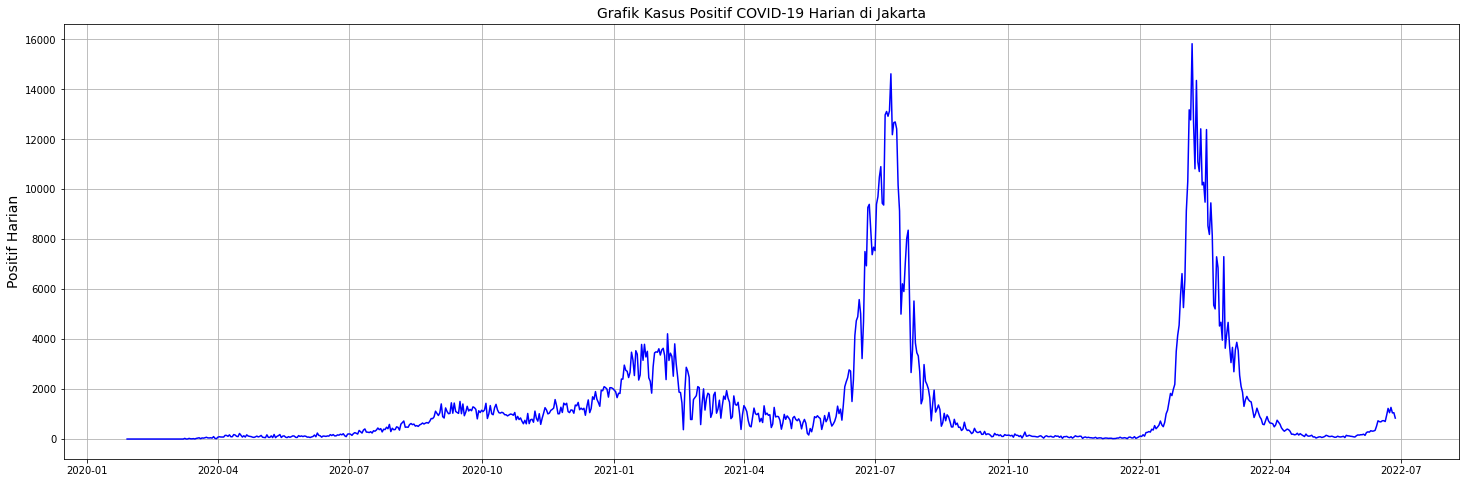

In [ ]:
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(25,8))
x.plot(data_jakarta['Tanggal'], data_jakarta['Positif Harian (Jakarta)'], 'b')
plt.title('Grafik Kasus Positif COVID-19 Harian di Jakarta', fontsize=14)
plt.ylabel('Positif Harian', fontsize=14)
plt.grid(True)
plt.show()



*   **Analisis Data Positif Harian 2021**

  Pada hasil visualisasi grafik kasus positif harian Jakarta, terlihat bahwa terjadi lonjakan yang cukup tajam pada bulan Juli 2021. Menurut detik.com, hal ini terjadi karena maraknya kasus COVID-19 varian delta pada mulai bulan Juli akhir, sekitar tanggal 20 Juli 2021.

  Pada 20 Juli 2021, Presiden Jokowi langsung mengumumkan diperpanjangnya PPKM darurat. Pada tanggal 22 Juli, kasus Covid-19 menembus 3 juta kasus dan ditetapkan PPKM sampai reda. 

  Oleh karena itu, terlihat adanya pengaruh dari penerapan kebijakan PPKM sehingga pada bulan Agustus sampai Oktober, kasus Covid-19 sudah mulai mereda.



* **Analisis Data Positif Harian 2022**

  Terlihat adanya lonjakan peningkatan kasus positif harian pada bulan Februari 2022 dikarenakan adanya varian baru yang masuk, yaitu Omicron.

  Menurut CNBC, penurunan kasus Covid-19 di Indonesia juga diiringi oleh berkurangnya jumlah orang yang dites Covid-19. Selama periode mudik pada 28 April 2022 hingga 3 Mei 2022, jumlah orang yang menjalani tes Covid-19 hanya berkisar 30.000-95.000 orang per hari.

  Pada puncak arus mudik 29 April 2022, jumlah orang yang menjalani tes Covid-19 hanya 71.873 orang. Jumlah orang yang menjalani tes Covid-19 turun drastis dibandingkan periode libur panjang Natal dan Tahun Baru akhir tahun 2021.

  Di bulan Desember 2021, jumlah orang yang menjalani tes berada di kisaran 180.000-200.000 per hari. Penurunan jumlah orang yang dites ini memang sudah diprediksi karena pemerintah memberikan pelonggaran.

### **Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


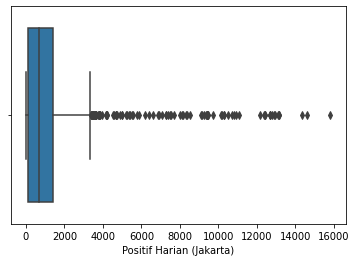

In [ ]:
sns.boxplot(data_jakarta['Positif Harian (Jakarta)'])

Outliers menunjukan bahwa ada jumlah kasus positif harian Jakarta yang lebih besar dibandingkan biasanya.

In [ ]:
Q1 = data_jakarta['Positif Harian (Jakarta)'].quantile(0.25)
Q3 = data_jakarta['Positif Harian (Jakarta)'].quantile(0.75)
IQR = Q3 - Q1 
outliers_=(data_jakarta['Positif Harian (Jakarta)'] > Q3  + 1.5*IQR) # outliers atas
outlier = data_jakarta.loc[outliers_]
outlier[['Tanggal','Positif Harian (Jakarta)']]

,Tanggal,Positif Harian (Jakarta)
319,2021-01-13,3476
322,2021-01-16,3536
323,2021-01-17,3395
326,2021-01-20,3786
328,2021-01-22,3792
...,...,...
734,2022-03-04,3727
736,2022-03-06,3669
738,2022-03-08,3569
739,2022-03-09,3872


Pada hasil diatas, dapat kita lihat pada akhir Juni 2021 hingga akhir Juli 2021 dan akhir Januari 2022 hingga awal Maret 2022, jumlah kasus positif harian lebih besar dari biasanya. Hal ini juga mendukung hasil analisis grafik data jumlah kasus positif harian sebelumnya, dimana pada bulan tersebut, kasus varian delta dan omicron sedang marak.

### **Perbandingan Jumlah Kasus Positif Harian Jakarta dengan Kasus Sembuh Harian COVID-19 Jakarta**

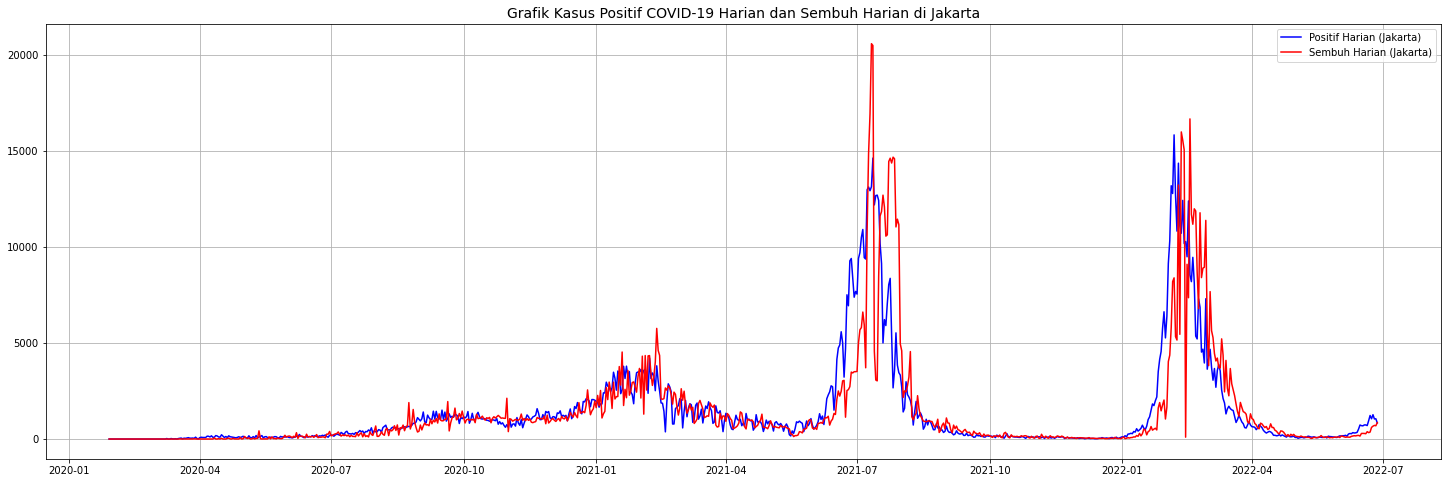

In [ ]:
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(25,8))
x.plot(data_jakarta['Tanggal'], data_jakarta['Positif Harian (Jakarta)'], 'b',label="Positif Harian (Jakarta)")
x.plot(data_jakarta['Tanggal'], data_jakarta['Sembuh Harian (Jakarta)'], 'r',label="Sembuh Harian (Jakarta)")
plt.title('Grafik Kasus Positif COVID-19 Harian dan Sembuh Harian di Jakarta', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

Dari hasil visualiasi diatas, dapat dilihat perbandingan antara jumlah kasus positif harian dengan kasus sembuh harian tidak jauh berbeda. Terdapat kasus sembuh yang lebih tinggi dibanding positif harian pada Juli 2021. Hal ini menandakan penanganan covid di Jakarta sudah cukup baik.

### **Kenaikan Kasus Positif Harian Jakarta**

In [ ]:
data_jakarta['Kenaikan'] = data_jakarta['Positif Harian (Jakarta)'].diff()
data_jakarta['Kenaikan'].to_frame().describe()

,Kenaikan
count,849.000000
mean,0.987044
std,617.466019
min,-4128.000000
25%,-74.000000
50%,-2.000000
75%,94.000000
max,3608.000000


In [ ]:
diffMax= data_jakarta.loc[data_jakarta['Kenaikan'] == 3608]
diffMax[['Tanggal','Positif Harian (Jakarta)','Kenaikan']]
#Kenaikan kasus positif harian tertinggi (Delta)

,Tanggal,Positif Harian (Jakarta),Kenaikan
495,2021-07-08,12974,3608.0


Pada hasil diatas, kenaikan terbesar terjadi pada 8 Juli 2021 sebesar 3608 kasus. Menurut tirto.id, sebaran varian virus Covid-19 terbanyak pada bulan Juli 2021 adalah varian Delta.

### **Grafik positif harian Jakarta dan tingkat mobilitas Jakarta pada tahun 2021**

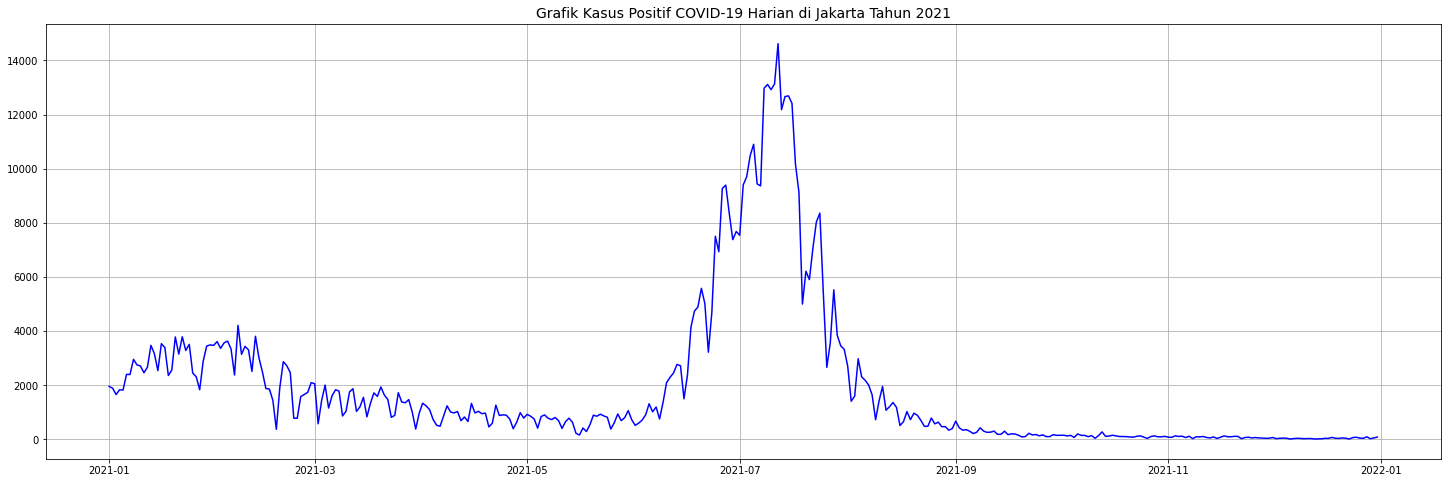

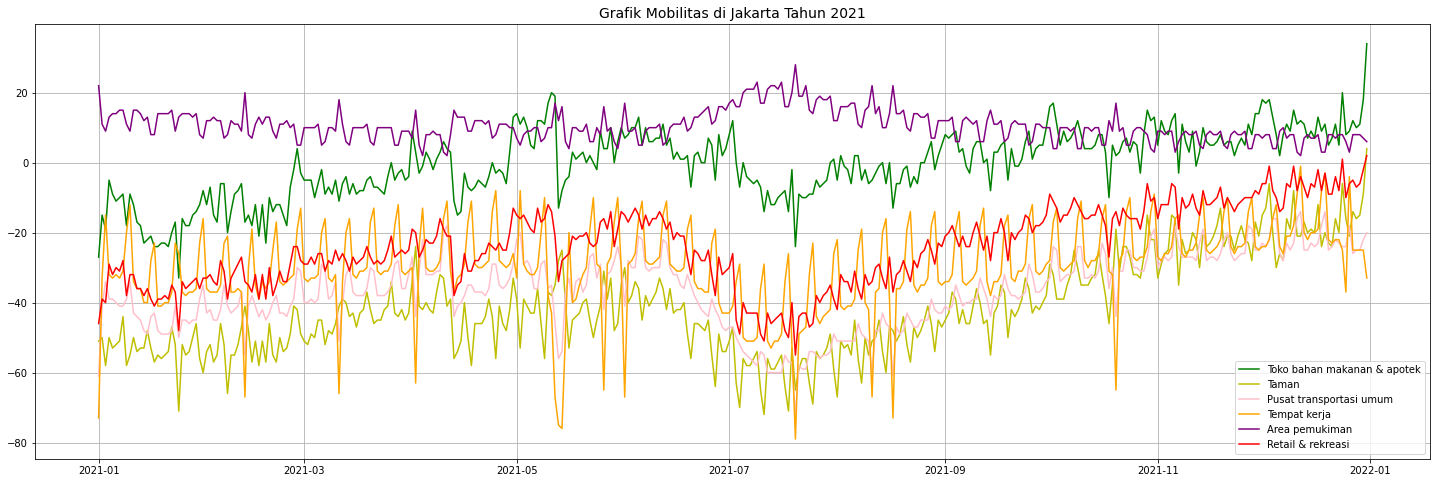

In [ ]:
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(25,8))
x.plot(data_jakarta['Tanggal'][307:672], data_jakarta["Positif Harian (Jakarta)"][307:672], 'b')
plt.title('Grafik Kasus Positif COVID-19 Harian di Jakarta Tahun 2021', fontsize=14)
plt.grid(True)
plt.show()
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(25,8))
x.plot(data_jakarta['Tanggal'][307:672], mobilitas_jakarta21['grocery_and_pharmacy_percent_change_from_baseline'], 'g',label="Toko bahan makanan & apotek")
x.plot(data_jakarta['Tanggal'][307:672], mobilitas_jakarta21['parks_percent_change_from_baseline'], 'y',label="Taman")
x.plot(data_jakarta['Tanggal'][307:672], mobilitas_jakarta21['transit_stations_percent_change_from_baseline'], 'pink',label="Pusat transportasi umum")
x.plot(data_jakarta['Tanggal'][307:672], mobilitas_jakarta21['workplaces_percent_change_from_baseline'], 'orange',label="Tempat kerja")
x.plot(data_jakarta['Tanggal'][307:672], mobilitas_jakarta21['residential_percent_change_from_baseline'], 'purple',label="Area pemukiman")
x.plot(data_jakarta['Tanggal'][307:672], mobilitas_jakarta21['retail_and_recreation_percent_change_from_baseline'], 'r',label="Retail & rekreasi")
plt.title('Grafik Mobilitas di Jakarta Tahun 2021', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

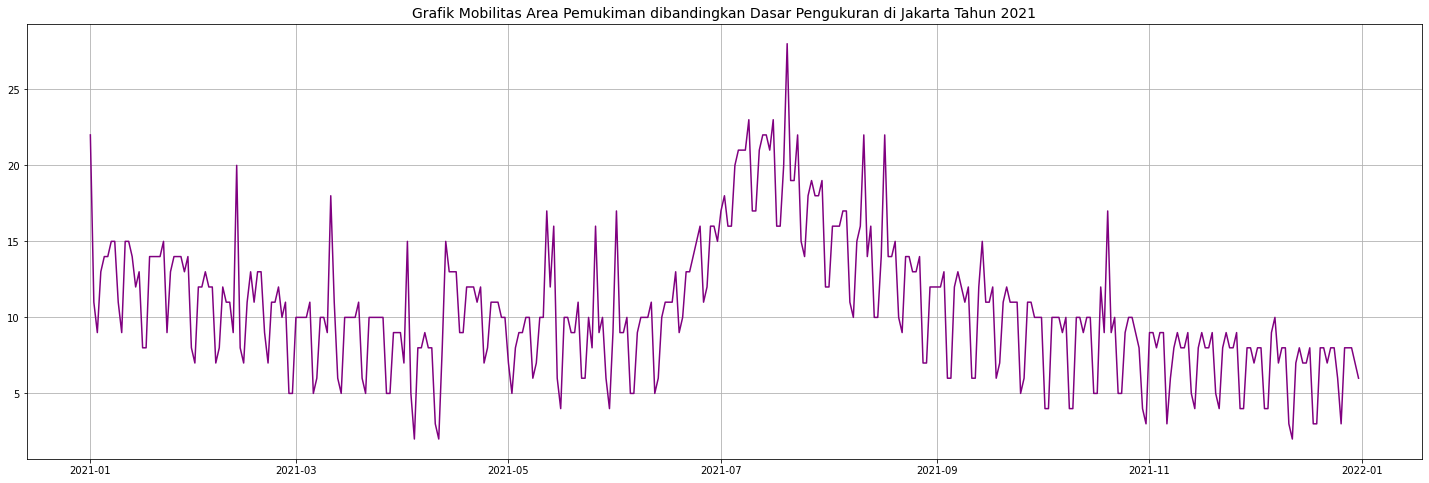

In [ ]:
ig,x = plt.subplots(nrows=1, ncols = 1, figsize=(25,8))
x.plot(data_jakarta['Tanggal'][307:672], mobilitas_jakarta21['residential_percent_change_from_baseline'], 'purple')
plt.title('Grafik Mobilitas Area Pemukiman dibandingkan Dasar Pengukuran di Jakarta Tahun 2021', fontsize=14)
plt.grid(True)
plt.show()

Pada visualisasi grafik mobilitas area pemukiman, terlihat bahwa mobilitas meningkat di sekitar bulan Juli 2021 yang bersamaan dengan libur perayaan Idul Adha. Jika dilihat dari grafik jumlah kasus positif harian Jakarta, jumlah kasus postif harian juga meningkat di sekitar bulan Juli 2021 sehingga terdapat dugaan bahwa terdapat korelasi positif yang kuat antara dua variabel tersebut.

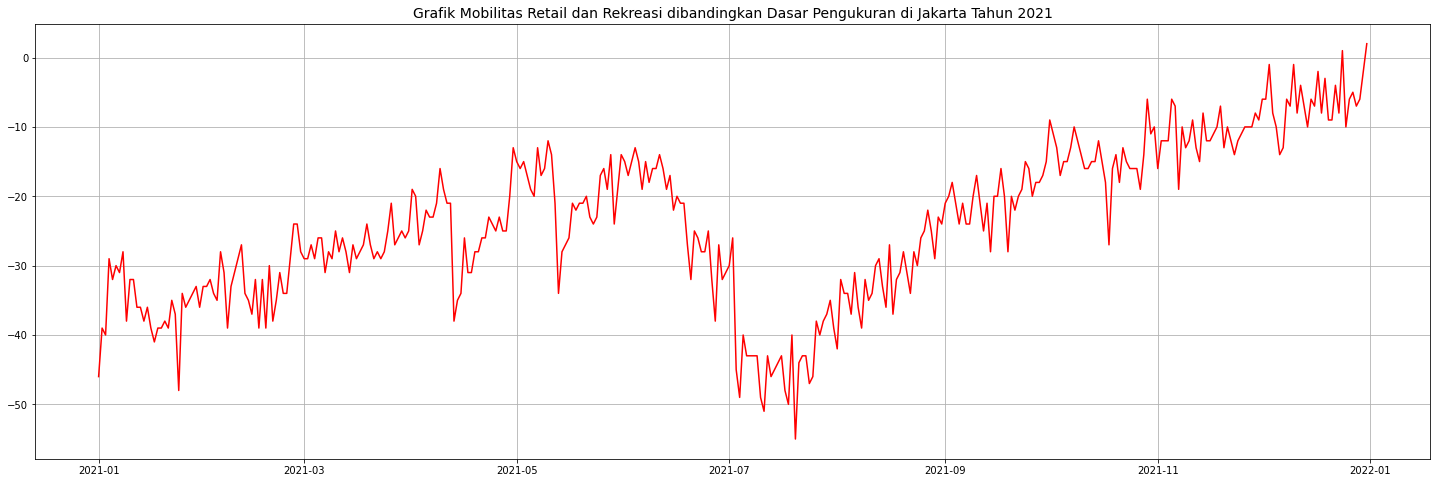

In [ ]:
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(25,8))
x.plot(data_jakarta['Tanggal'][307:672], mobilitas_jakarta21['retail_and_recreation_percent_change_from_baseline'], 'r')
plt.title('Grafik Mobilitas Retail dan Rekreasi dibandingkan Dasar Pengukuran di Jakarta Tahun 2021', fontsize=14)
plt.grid(True)
plt.show()

Pada visualisasi grafik mobilitas retail dan rekreasi, terlihat bahwa mobilitas menurun di sekitar bulan Juli 2021. Jika dilihat dari grafik jumlah kasus positif harian Jakarta, jumlah kasus postif harian justru meningkat di sekitar bulan Juli 2021 sehingga terdapat dugaan bahwa terdapat korelasi negatif yang kuat antara dua variabel tersebut.

### **Grafik positif harian Jakarta dan tingkat mobilitas Jakarta pada tahun 2022 per 27 Juni 2022**

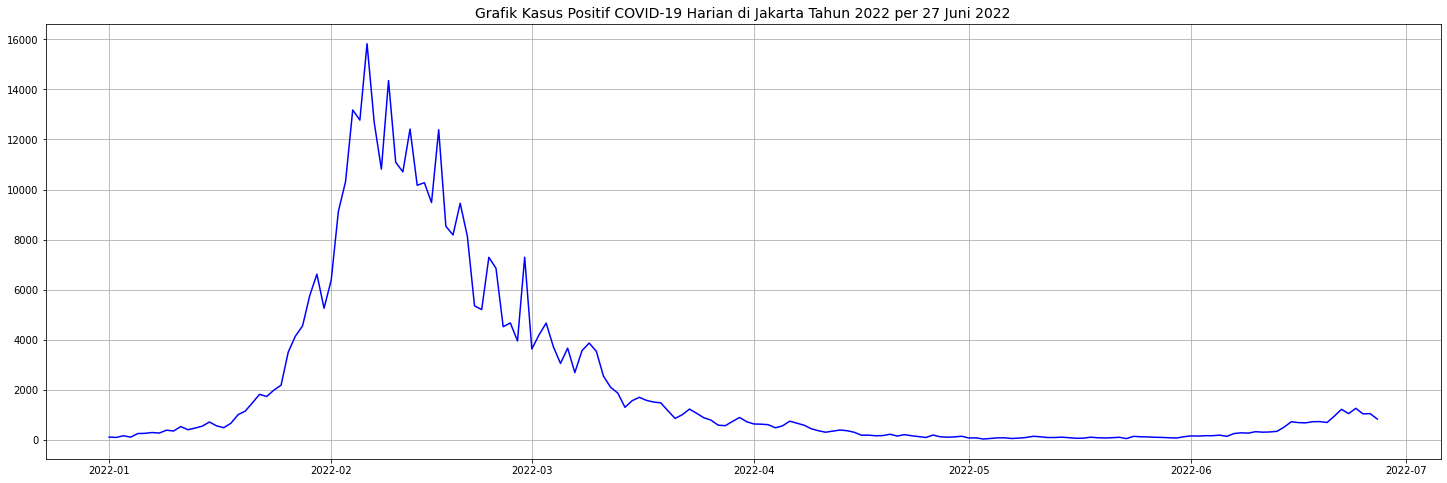

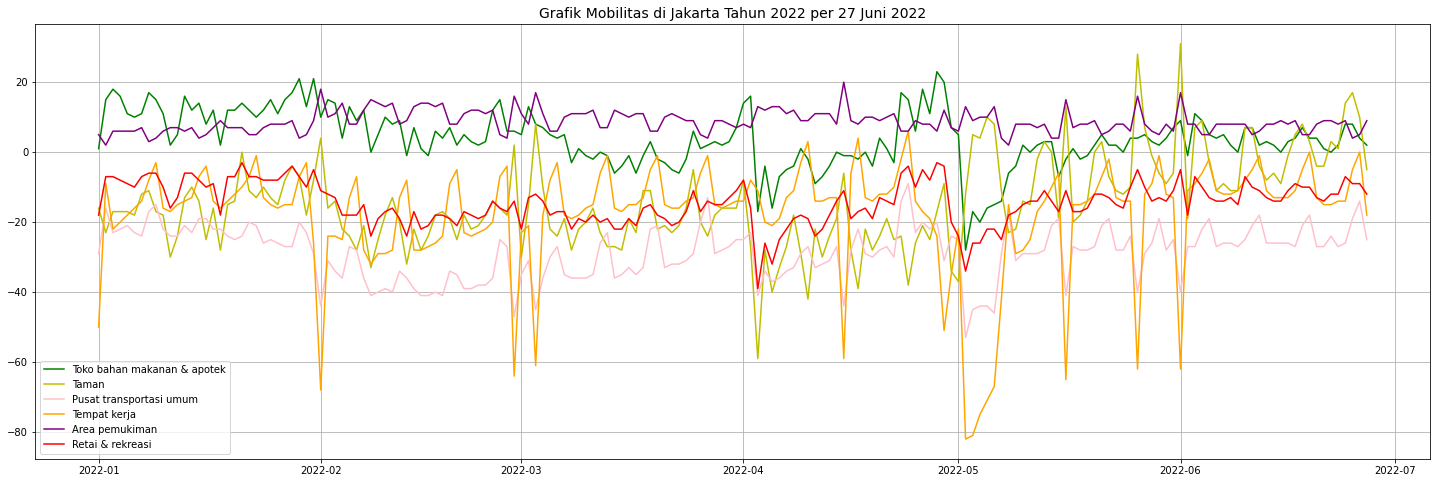

In [ ]:
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(25,8))
x.plot(data_jakarta['Tanggal'][672:850], data_jakarta["Positif Harian (Jakarta)"][672:850], 'b')
plt.title('Grafik Kasus Positif COVID-19 Harian di Jakarta Tahun 2022 per 27 Juni 2022', fontsize=14)
plt.grid(True)
plt.show()
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(25,8))
x.plot(data_jakarta['Tanggal'][672:850], mobilitas_jakarta22['grocery_and_pharmacy_percent_change_from_baseline'], 'g',label="Toko bahan makanan & apotek")
x.plot(data_jakarta['Tanggal'][672:850], mobilitas_jakarta22['parks_percent_change_from_baseline'], 'y',label="Taman")
x.plot(data_jakarta['Tanggal'][672:850], mobilitas_jakarta22['transit_stations_percent_change_from_baseline'], 'pink',label="Pusat transportasi umum")
x.plot(data_jakarta['Tanggal'][672:850], mobilitas_jakarta22['workplaces_percent_change_from_baseline'], 'orange',label="Tempat kerja")
x.plot(data_jakarta['Tanggal'][672:850], mobilitas_jakarta22['residential_percent_change_from_baseline'], 'purple',label="Area pemukiman")
x.plot(data_jakarta['Tanggal'][672:850], mobilitas_jakarta22['retail_and_recreation_percent_change_from_baseline'], 'r',label="Retai & rekreasi")
plt.title('Grafik Mobilitas di Jakarta Tahun 2022 per 27 Juni 2022', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

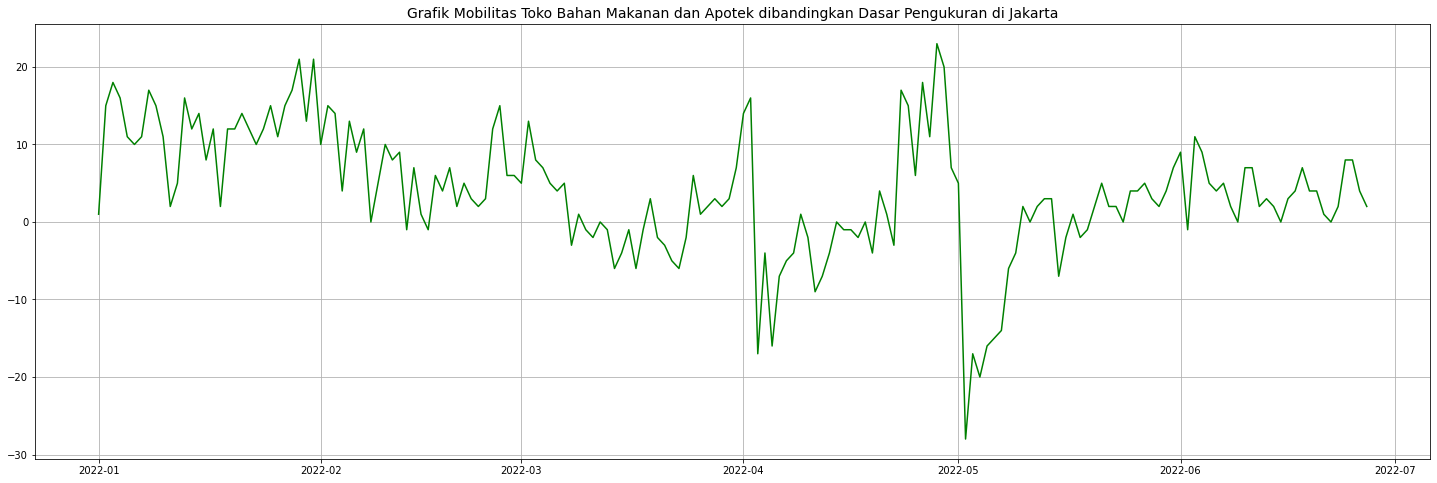

In [ ]:
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(25,8))
x.plot(data_jakarta['Tanggal'][672:850], mobilitas_jakarta22['grocery_and_pharmacy_percent_change_from_baseline'], 'g')

plt.title('Grafik Mobilitas Toko Bahan Makanan dan Apotek dibandingkan Dasar Pengukuran di Jakarta', fontsize=14)
plt.grid(True)
plt.show()


Hasil Visualisasi menunjukkan bahwa adanya kecenderungan peningkatan mobilitas masyarakat Jakarta untuk pergi ke toko bahan makanan dan apotek pada akhir bulan April, hal ini bersamaan dengan peringatan hari raya idul fitri. Kemudian, mobilitas ke toko bahan makanan dan apotek turun dratis pada awal Mei bersamaan dengan peningkatan kasus Covid-19 varian Omicron yang meningkat 3,66% per tanggal 7 Mei 2022.

Pada bulan Januari - Maret 2022, terlihat mobilitas masyarakat Jakarta untuk pergi ke toko bahan makanan dan apotek cukup tinggi dibandingkan pada bulan lainnya.

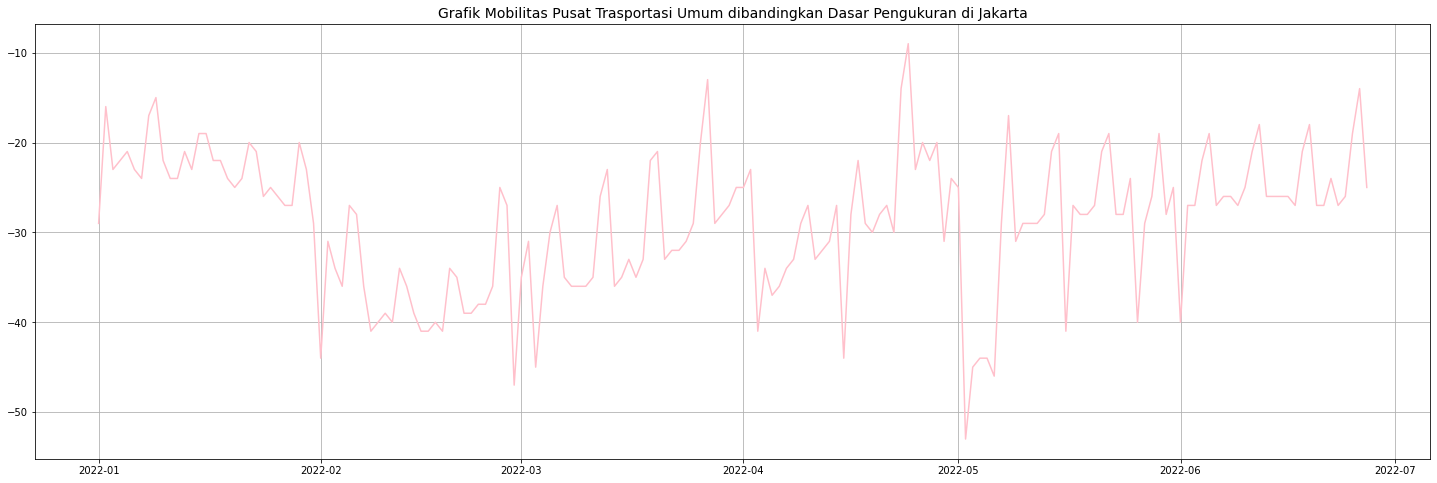

In [ ]:
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(25,8))
x.plot(data_jakarta['Tanggal'][672:850], mobilitas_jakarta22['transit_stations_percent_change_from_baseline'], 'pink')
plt.title('Grafik Mobilitas Pusat Trasportasi Umum dibandingkan Dasar Pengukuran di Jakarta', fontsize=14)
plt.grid(True)
plt.show()

Pada hasil visualisasi mobilitas pusat transportasi umum terlihat pada pertengahan hingga akhir April terdapat peningkatan tren mobilitas masyarakat Jakarta ke transportasi umum akibat banyaknya masyarakat Jakarta pulang kampung untuk merayakan Idul Fitri. Berdasarkan Data Kementrian Perhubungan, jumlah pemudik 2022 mencapai 85 juta orang dan 14 juta di antaranya berasal dari pemudik Jabodetabek. 

Pada bulan Februari 2022, terlihat mobilitas pusat transportasi umum cukup rendah dibandingkan pada bulan lainnya.

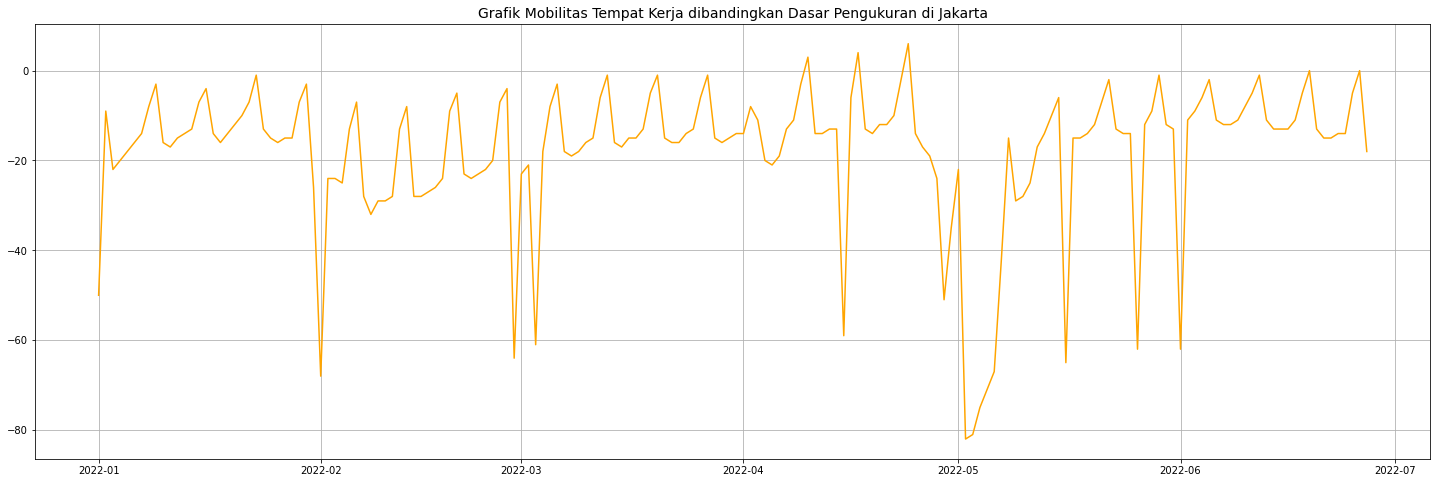

In [ ]:
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(25,8))
x.plot(data_jakarta['Tanggal'][672:850], mobilitas_jakarta22['workplaces_percent_change_from_baseline'], 'orange')
plt.title('Grafik Mobilitas Tempat Kerja dibandingkan Dasar Pengukuran di Jakarta', fontsize=14)
plt.grid(True)
plt.show()

Pada visualisasi mobilitas masyarakat Jakarta, dapat dilihat grafik mobilitas cenderung adanya fluktuasi, hal ini dimungkinkan karena terdapat perusahaan yang menetapkan WFH dan sistem Hybrid (WFH dan WFO).

Pada akhir bulan Januari sampai awal bulan Februari 2022, terjadi lonjakan kasus Covid varian baru, yaitu Omicron sehingga terdapat penurunan mobilitas ke tempat kerja. Sementara pada akhir April sampai awal Mei, merupakan libur hari raya idul fitri (cuti bersama).

# **Modelling**

Setelah dilakukan Exploratory Data Analysis, kami melihat terdapat dugaan adanya hubungan antara jumlah kasus positif harian Jakarta pada saat varian delta dan omicron sedang marak dengan beberapa jenis tingkat mobilitas.

Oleh karena itu, untuk mengetahui secara lebih akurat akan dilakukan perhitungan secara statistik melalui analisis korelasi antara jumlah kasus positif harian Jakarta dengan beberapa jenis tingkat mobilitas pada rentang waktu ketika jumlah kasus varian delta dan omicron sedang meningkat.

Berikut merupakan pedoman untuk menentukan tingkat kekuatan korelasi:
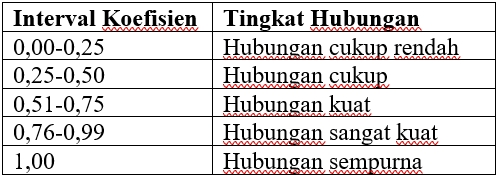

### Hipotesis
**H0** : Tidak ada korelasi yang kuat antara jumlah kasus positif harian Jakarta dengan mobilitas ke retail dan rekreasi, mobilitas ke toko bahan makanan dan apotek, mobilitas ke taman, mobilitas pusat transportasi umum, mobilitas ke tempat kerja, dan mobilitas untuk area pemukiman di Jakarta pada periode 1 Juni 2021 - 31 Agustus 2021.

**H1** : Terdapat korelasi yang kuat antara jumlah kasus positif harian Jakarta dengan mobilitas ke retail dan rekreasi, mobilitas ke toko bahan makanan dan apotek, mobilitas ke taman, mobilitas pusat transportasi umum, mobilitas ke tempat kerja, dan mobilitas untuk area pemukiman di Jakarta pada periode 1 Juni 2021 - 31 Agustus 2021.

**Korelasi antara Positif Harian Jakarta dengan Variabel Mobilitas Jakarta Periode 1 Juni 2021-31 Agustus 2021**

In [ ]:
r1 = stats.spearmanr(data_jakarta['Positif Harian (Jakarta)'][458:550], mobilitas_jakarta21['retail_and_recreation_percent_change_from_baseline'][151:243])
print("Korelasi Positif Harian Jakarta dengan Mobilitas ke Retail dan Rekreasi adalah", r1[0])

r2 = stats.spearmanr(data_jakarta['Positif Harian (Jakarta)'][458:550], mobilitas_jakarta21['grocery_and_pharmacy_percent_change_from_baseline'][151:243])
print("Korelasi Positif Harian Jakarta dengan Mobilitas ke Toko Bahan Makanan dan Apotek adalah",r2[0])

r3 = stats.spearmanr(data_jakarta['Positif Harian (Jakarta)'][458:550], mobilitas_jakarta21['parks_percent_change_from_baseline'][151:243])
print("Korelasi Positif Harian Jakarta dengan Mobilitas ke Taman adalah",r3[0])

r4 = stats.spearmanr(data_jakarta['Positif Harian (Jakarta)'][458:550], mobilitas_jakarta21['transit_stations_percent_change_from_baseline'][151:243])
print("Korelasi Positif Harian Jakarta dengan Mobilitas Pusat Transportasi Umum adalah",r4[0])

r5 = stats.spearmanr(data_jakarta['Positif Harian (Jakarta)'][458:550], mobilitas_jakarta21['workplaces_percent_change_from_baseline'][151:243])
print("Korelasi Positif Harian Jakarta dengan Mobilitas ke Tempat Kerja adalah",r5[0])

r6 = stats.spearmanr(data_jakarta['Positif Harian (Jakarta)'][458:550], mobilitas_jakarta21['residential_percent_change_from_baseline'][151:243])
print("Korelasi Positif Harian Jakarta dengan Mobilitas untuk Area Pemukiman adalah",r6[0])

Korelasi Positif Harian Jakarta dengan Mobilitas ke Retail dan Rekreasi adalah -0.6300715827960011
Korelasi Positif Harian Jakarta dengan Mobilitas ke Toko Bahan Makanan dan Apotek adalah -0.36685896138108576
Korelasi Positif Harian Jakarta dengan Mobilitas ke Taman adalah -0.5798160834480989
Korelasi Positif Harian Jakarta dengan Mobilitas Pusat Transportasi Umum adalah -0.49272247166550315
Korelasi Positif Harian Jakarta dengan Mobilitas ke Tempat Kerja adalah -0.35091707565266417
Korelasi Positif Harian Jakarta dengan Mobilitas untuk Area Pemukiman adalah 0.5670959731284888


Korelasi dengan mobilitas area pemukiman menunjukkan hasil sebesar **0,5671** dimana hal ini menunjukkan adanya korelasi positif yang kuat sehingga hubungan antara **jumlah kasus positif harian Jakarta dengan mobilitas area pemukiman** pada periode 1 Juni-31 Agustus 2021 adalah **positif atau berbanding lurus**.

Kemudian, korelasi dengan mobilitas retail dan rekreasi menunjukkan hasil sebesar **-0.63** dimana hal ini menunjukkan adanya korelasi negatif yang kuat sehingga hubungan antara **jumlah kasus positif harian Jakarta dengan mobilitas retail dan rekreasi** pada periode 1 Juni 2021 - 31 Agustus 2021 adalah **negatif atau berbanding terbalik**.

### **Hipotesis**
**H0** : Tidak ada korelasi yang kuat antara jumlah kasus positif harian Jakarta dengan mobilitas ke retail dan rekreasi, mobilitas ke toko bahan makanan dan apotek, mobilitas ke taman, mobilitas pusat transportasi umum, mobilitas ke tempat kerja, dan mobilitas untuk area pemukiman di Jakarta pada periode 1 Februari 2022 - 31 maret 2022.

**H1** : Terdapat korelasi yang kuat antara jumlah kasus positif harian Jakarta dengan mobilitas ke retail dan rekreasi, mobilitas ke toko bahan makanan dan apotek, mobilitas ke taman, mobilitas pusat transportasi umum, mobilitas ke tempat kerja, dan mobilitas untuk area pemukiman di Jakarta pada periode 1 Februari 2022 - 31 maret 2022.


**Korelasi antara Positif Harian Jakarta dengan Variabel Mobilitas Jakarta Periode 1 Februari 2022-31 Maret 2022**

In [ ]:
r1 = stats.spearmanr(data_jakarta['Positif Harian (Jakarta)'][703:762], mobilitas_jakarta22['retail_and_recreation_percent_change_from_baseline'][31:90])
print("Korelasi Positif Harian Jakarta dengan Mobilitas Retail dan Rekreasi adalah", r1[0])

r2 = stats.spearmanr(data_jakarta['Positif Harian (Jakarta)'][703:762], mobilitas_jakarta22['grocery_and_pharmacy_percent_change_from_baseline'][31:90])
print("Korelasi Positif Harian Jakarta dengan Mobilitas Toko Bahan Makanan dan Apotek adalah",r2[0])

r3 = stats.spearmanr(data_jakarta['Positif Harian (Jakarta)'][703:762], mobilitas_jakarta22['parks_percent_change_from_baseline'][31:90])
print("Korelasi Positif Harian Jakarta dengan Mobilitas Taman adalah",r3[0])

r4 = stats.spearmanr(data_jakarta['Positif Harian (Jakarta)'][703:762], mobilitas_jakarta22['transit_stations_percent_change_from_baseline'][31:90])
print("Korelasi Positif Harian Jakarta dengan Mobilitas Pusat Transportasi Umum adalah",r4[0])

r5 = stats.spearmanr(data_jakarta['Positif Harian (Jakarta)'][703:762], mobilitas_jakarta22['workplaces_percent_change_from_baseline'][31:90])
print("Korelasi Positif Harian Jakarta dengan Mobilitas Tempat Kerja adalah",r5[0])

r6 = stats.spearmanr(data_jakarta['Positif Harian (Jakarta)'][703:762], mobilitas_jakarta22['residential_percent_change_from_baseline'][31:90])
print("Korelasi Positif Harian Jakarta dengan Mobilitas Area Pemukiman adalah",r6[0])

Korelasi Positif Harian Jakarta dengan Mobilitas Retail dan Rekreasi adalah -0.1338667262797823
Korelasi Positif Harian Jakarta dengan Mobilitas Toko Bahan Makanan dan Apotek adalah 0.5220544800687329
Korelasi Positif Harian Jakarta dengan Mobilitas Taman adalah -0.15363029952493062
Korelasi Positif Harian Jakarta dengan Mobilitas Pusat Transportasi Umum adalah -0.5758152688622578
Korelasi Positif Harian Jakarta dengan Mobilitas Tempat Kerja adalah -0.5059051358667598
Korelasi Positif Harian Jakarta dengan Mobilitas Area Pemukiman adalah 0.46561268680348383


Korelasi dengan mobilitas toko bahan makanan dan apotek menujukkan hasil sebesar **0,522** dimana hal ini menunjukkan korelasi positif yang kuat sehingga hubungan antara **jumlah kasus positif harian Jakarta dengan mobilitas area toko bahan makanan dan apotek** pada periode 1 Februari 2022-31 Maret 2022 adalah **positif atau berbanding lurus**.

Kemudian, korelasi dengan pusat transportasi umum menunjukkan hasil sebesar **-0.5758** dimana hal ini menujukkan korelasi negatif yang kuat sehingga hubungan antara **jumlah kasus positif harian Jakarta dengan mobilitas pusat transportasi umum** pada periode 1 Februari 2022-31 Maret 2022 adalah **negatif atau berbanding terbalik**.

Selanjutnya, korelasi dengan tempat kerja menunjukkan hasil sebesar **-0.5059** dimana hal ini menujukkan korelasi negatif yang kuat sehingga hubungan antara **jumlah kasus positif harian Jakarta dengan mobilitas tempat kerja** pada periode 1 Februari 2022-31 Maret 2022 adalah **negatif atau berbanding terbalik**.

# **Conclusion**
1. Terdapat pengaruh penerapan kebijakan PPKM terhadap jumlah kasus positif harian Covid-19 di Jakarta terlihat dari adanya penurunan grafik jumlah kasus positif harian Jakarta setelah diterapkannya PPKM.
2. Varian delta menyebabkan peningkatan jumlah kasus positif harian yang signifikan pada akhir Juli 2021 dan varian omicron menyebabkan lonjakan peningkatan kasus pada Februari-Maret 2022.
3. Mutasi virus memungkinkan terjadinya kenaikan jumlah kasus positif harian Covid-19.
3. Pada saat kasus varian delta meningkat secara signifikan (1 Juni 2021 - 31 Agustus 2021), terdapat korelasi positif yang kuat antara jumlah kasus positif harian dengan mobilitas untuk area pemukiman dan korelasi negatif yang kuat dengan mobilitas ke retail dan rekreasi.
4. Pada saat kasus varian omicron meningkat secara signifikan (1 Februari 2022 - 31 Maret 2022), terdapat korelasi positif yang kuat antara jumlah kasus positif harian dengan mobilitas ke area toko bahan makanan dan apotek dan korelasi negatif yang kuat dengan mobilitas pusat transportasi umum dan tempat kerja.
5. Per tanggal 27-06-2022, rata-rata jumlah kasus positif harian Jakarta sebanyak 1.489,531 kasus.
6. Per tanggal 27-06-2022, jumlah kasus positif harian tertinggi sebanyak 15.825 kasus terjadi pada 6 Februari 2022.
7. Penurunan kasus Covid-19 pada tahun 2022 diiringi oleh berkurangnya jumlah orang yang dites Covid-19. Hal ini karena adanya kebijakan aturan perjalanan tanpa tes antigen dan PCR bagi yang sudah vaksinasi dosis kedua atau vaksinasi dosis ketiga (booster) (Surat Edaran Satgas Covid-19 Nomor 11 Tahun 2022).
8. Penanganan kasus Covid-19 di Jakarta sudah cukup baik terlihat dari grafik jumlah kasus positif harian dan kasus sembuh harian yang tidak jauh berbeda.
9. Per tanggal 27-06-2022, kenaikan jumlah kasus positif harian terbesar terjadi pada 8 Juli 2021 sebesar 3608 kasus yang bersamaan dengan maraknya kasus varian delta.

# **Rekomendasi**

1. Pemerintah terus memberikan imbauan agar masyarakat tidak lalai menjaga protokol kesehatan serta memberikan kebijakan PPKM jika kasus Covid-19 mulai meningkat.
2. Tiap individu harus mempunyai kesadaran untuk tetap menjaga protokol kesehatan terutama saat melakukan mobilitas karena virus Covid-19 yang masih ada.
3. Pemerintah mengantisipasi kemungkinan adanya mutasi virus baru karena mutasi virus baru menjadi salah satu faktor melonjaknya jumlah positif kasus positif harian Covid-19.
4. Pemerintah dapat melakukan dugaan awal klaster penyebaran virus Covid-19 melalui jenis tingkat mobilitas masyarakat.
5. Pemerintah dapat melakukan tes Covid-19 secara acak di tempat-tempat yang berpotensi adanya penyebaran (tinggi mobilitas).
6. Masyarakat dapat melakukan tes Covid-19 jika merasa terdapat gejala Covid-19 agar tracing dapat berjalan maksimal.

# **Daftar Pustaka**

Hans, R. (2022). Simak Pengertian Analisis Data dengan Korelasi Rank Spearman. Diakses pada 3 Juli 2022, dari https://www.dqlab.id/simak-pengertian-analisis-data-dengan-korelasi-rank-spearman

Kasus Covid Kian Landai, Tetap Waspada Lonjakan Habis Lebaran. (2022). Diakses pada 1 Juli 2022, dari https://www.cnbcindonesia.com/news/20220504115552-4-336716/kasus-covid-kian-landai-tetap-waspada-lonjakan-habis-lebara

Prediksi Jumlah Pemudik 2022 | Indonesia Baik. (2022). Diakses pada 4 Juli 2022, dari https://indonesiabaik.id/infografis/prediksi-jumlah-pemudik-2022

Syambudi, I. (2022). Sebaran Varian Baru Virus Corona RI per Juli 2021: Delta Terbanyak. Diakses pada 3 Juli 2022, dari https://tirto.id/sebaran-varian-baru-virus-corona-ri-per-juli-2021-delta-terbanyak-ghyX

Update Omicron : Total di Indonesia Ada 11.159 Kasus (Sabtu, 07 Mei 2022).(2022). Diakses pada 1 Juli 2022, dari https://databoks.katadata.co.id/datapublish/2022/05/07/update-omicron--total-di-indonesia-ada-11159-kasus-sabtu-07-mei-2022